# [goulib](../notebook.ipynb).geom
Vector, matrix and quaternion operations + line, arc, circle entities for use in 2D and 3D graphics applications.


In [1]:
from goulib.notebook import *
from goulib.geom import *
import sys,inspect
print('geom defines the following classes : %s'%dict(inspect.getmembers(sys.modules['goulib.geom'], inspect.isclass)).keys())

geom defines the following classes : dict_keys(['Arc2', 'Circle', 'Ellipse', 'Geometry', 'Line2', 'Matrix3', 'Point2', 'Polygon', 'Ray2', 'Segment2', 'Surface', 'Vector2'])


In [2]:
Arc2((0,0),(0,1),(1,0)) #does not render in notebook

Arc2(center=Point2(0, 0),p1=Point2(0, 1),p2=Point2(1, 0),r=1.0)

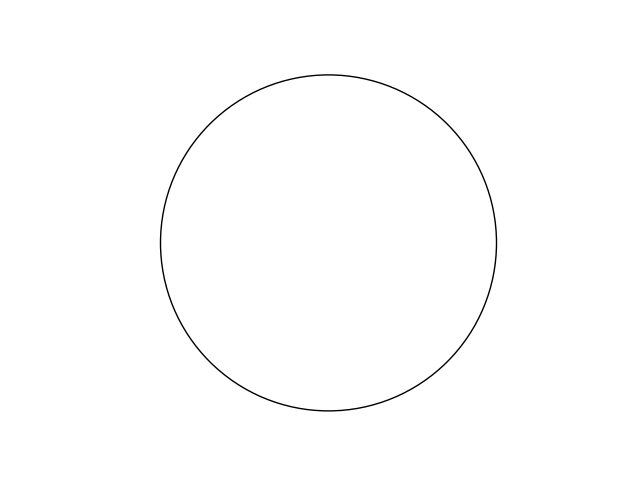

In [3]:
from goulib.drawing import * #adds rendering (and more) to Geom
a=Arc2((0,0),(0,1),(1,0)) #same class is now rendered inline
a

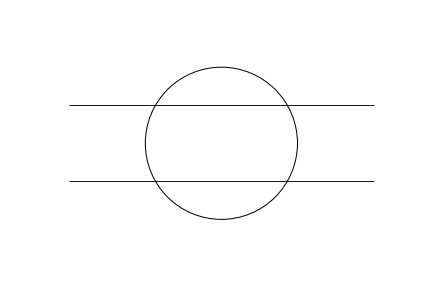

In [4]:
l1=Segment2((-2,.5),Vector2(4,0)) #horizontal at y=0.5
l2=Segment2((-2,-.5),Vector2(4,0)) #horizontal at y=-0.5
lines=Group([l1,l2])
lines.color='blue'
Group([lines,a])

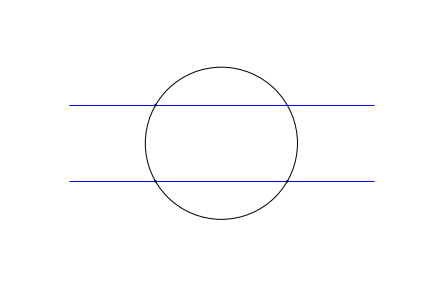

In [5]:
pts=Group([i[0] for i in lines.intersect(a)]) # list of intersection points
Group([lines,a,pts])

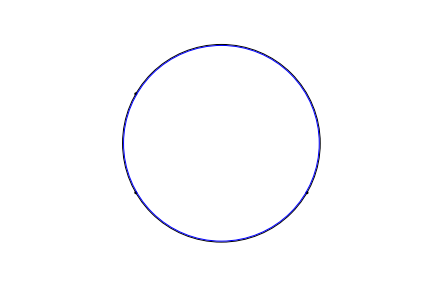

In [6]:
c1=circle_from_3_points(*pts) # classic
a1=arc_from_3_points(*pts) # not trivial ;-)
a1.r*=.99
a1.color='blue'
Group([pts,c1,a1])

# [goulib](../notebook.ipynb).drawing
vector graphics in .dxf, .svg and .pdf formats based on Geom

In [7]:
from goulib.drawing import *
import inspect
h('drawing adds more classes to geom : %s'%dict(inspect.getmembers(sys.modules['goulib.drawing'], inspect.isclass)).keys())

In [8]:
c1=Circle(Point2(4,4),1)
#drawing Entities support colors and othe graphic attributes
c1.color='blue'
c1.width=5
c1.fill='cyan'
r1=Rect((0,0),(-1,1))
r2=Rect((1,-1),(2,2))
c2=Circle(Point2(0,2),.5)

In [9]:
from goulib.table import Table
Table([[c1,c2],[r1,r2]]) # Entities have an HTML representation for tables

"<?xml version=""1.0"" encoding=""utf-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Created with matplotlib (https://matplotlib.org/) --> <path d=""M 221.4 -45.883636 C 247.61171 -45.883636 272.753385 -56.297659 291.287863 -74.832137 C 309.822341 -93.366615 320.236364 -118.50829 320.236364 -144.72 C 320.236364 -170.93171 309.822341 -196.073385 291.287863 -214.607863 C 272.753385 -233.142341 247.61171 -243.556364 221.4 -243.556364 C 195.18829 -243.556364 170.046615 -233.142341 151.512137 -214.607863 C 132.977659 -196.073385 122.563636 -170.93171 122.563636 -144.72 C 122.563636 -118.50829 132.977659 -93.366615 151.512137 -74.832137 C 170.046615 -56.297659 195.18829 -45.883636 221.4 -45.883636 z "" id=""m20af92575a"" style=""stroke:#0000ff;stroke-width:5;""/>","<?xml version=""1.0"" encoding=""utf-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Created with matplotlib (https://matplotlib.org/) --> <path d=""M 221.4 -45.883636 C 247.61171 -45.883636 272.753385 -56.297659 291.287863 -74.832137 C 309.822341 -93.366615 320.236364 -118.50829 320.236364 -144.72 C 320.236364 -170.93171 309.822341 -196.073385 291.287863 -214.607863 C 272.753385 -233.142341 247.61171 -243.556364 221.4 -243.556364 C 195.18829 -243.556364 170.046615 -233.142341 151.512137 -214.607863 C 132.977659 -196.073385 122.563636 -170.93171 122.563636 -144.72 C 122.563636 -118.50829 132.977659 -93.366615 151.512137 -74.832137 C 170.046615 -56.297659 195.18829 -45.883636 221.4 -45.883636 z "" id=""m815b04cd9d"" style=""stroke:#000000;""/>"
"<?xml version=""1.0"" encoding=""utf-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Created with matplotlib (https://matplotlib.org/) -->","<?xml version=""1.0"" encoding=""utf-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Created with matplotlib (https://matplotlib.org/) -->"


Geom offers many geometric constructs

In [10]:
s1=r1.connect(r2)
s1.color='red'
s2=r2.connect(c1)
s2.color='red'
s3=c1.connect(c2)
s3.color='red'

Geom entities and others defined in Drawing can be grouped :

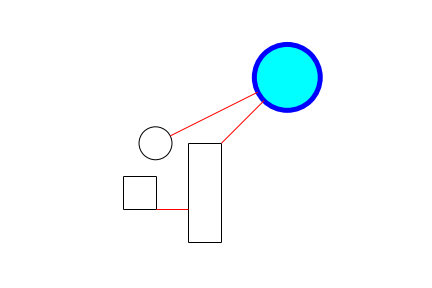

In [11]:
g=Group([r1,r2,c1,c2,s1,s2,s3])
g

Groups can be handled as entities :

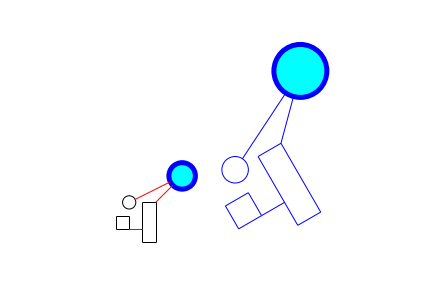

In [12]:
g2=Trans(scale=2, offset=(10,1), rotation=30)*g
g2.color='blue'
h(g.distance(g2))
Group([g,g2]) #group of groups

Drawing objects can be read/saved from/to various formats including pdf, svg and dxf 

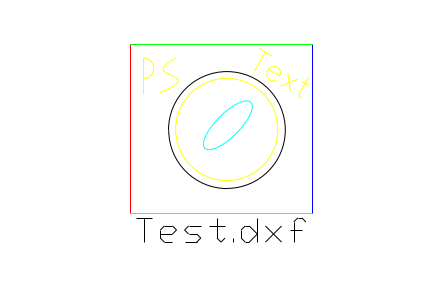

In [13]:
Drawing('../tests/data/drawing.pdf')

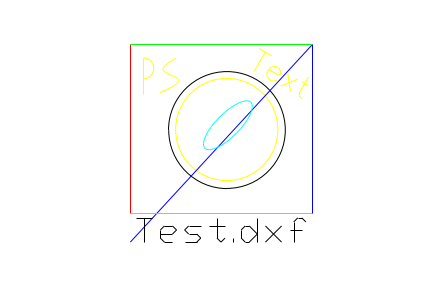

In [14]:
Drawing('../tests/data/drawing.svg')

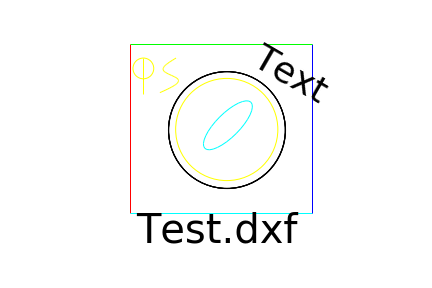

In [15]:
Drawing('../tests/data/drawing.dxf')

Drawing also extends geom to allow geometric constructions


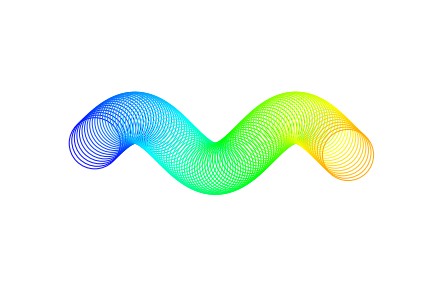

In [16]:
from goulib.colors import color_range
d=Drawing()
for i,color in enumerate(color_range(100,'blue','orange')):
    circle=Circle((i*.1,sin(.1*i)),1)
    circle.color=color.hex
    d.append(circle)
d

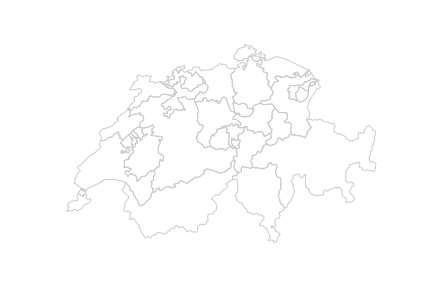

In [17]:
Drawing('../tests/data/switzerlandLow.svg')